In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_pca(X , n):
    # standardize the mean to 0
    X_mean = X - np.mean(X , axis = 0)
     
    # generate the covariance matrix
    covariance_matrix = np.cov(X_mean, rowvar = False)
     
    # compute the eigen computations
    eigenvalues , eigenvectors = np.linalg.eigh(covariance_matrix)
     
    # sort n eigenvectors by descending order of corresponding eigenvalues
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalue = eigenvalues[sorted_index]
    eigenvectors = eigenvectors[:,sorted_index]
    eigenvectors = eigenvectors[:,0:n]
     
    # transorm data to the principal components
    X_reduced = np.dot(eigenvectors.transpose() , X_mean.transpose() ).transpose()
     
    return X_reduced

In [3]:
# prepare IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
X = data.iloc[:,0:4]
 
# extract labels
labels = np.array(data.iloc[:,4])

principal_components = calculate_pca(X , 2).T

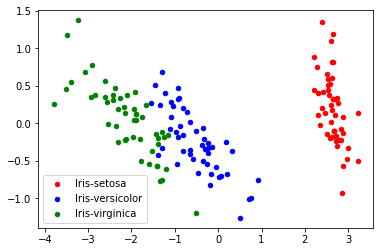

In [4]:
colours = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(principal_components[0][ix], principal_components[1][ix], c = colours[g], label = g, s = 20)
ax.legend()
plt.show()